In [1]:
import csv
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
from sklearn import utils
from sklearn.ensemble import RandomForestRegressor


In [2]:
loc9foodlog = pd.read_csv("loc9.csv")

In [39]:
loc9foodlog.head()

,Unnamed: 0,itemname,mealtype,quantity,quantitytype,datesort
0,1,Cream of Wheat,NaN,9.0,Pound,1
1,2,Scrambled Eggs,NaN,5.0,Pound,1
2,3,Scrambled Eggs,NaN,5.0,Pound,1
3,5,Home Fries,NaN,3.0,Pound,1
4,6,Corned Beef Hash,NaN,5.0,Pound,1


In [40]:
loc9pound = loc9foodlog[loc9foodlog['quantitytype']=='Pound']

In [41]:
loc9pound.head()

,Unnamed: 0,itemname,mealtype,quantity,quantitytype,datesort
0,1,Cream of Wheat,NaN,9.0,Pound,1
1,2,Scrambled Eggs,NaN,5.0,Pound,1
2,3,Scrambled Eggs,NaN,5.0,Pound,1
3,5,Home Fries,NaN,3.0,Pound,1
4,6,Corned Beef Hash,NaN,5.0,Pound,1


In [42]:
loc9pound.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Unnamed: 0,3182,NaN,NaN,NaN,2506.86,1536.55,1,1149.25,2467.5,3794.75,5199
itemname,3182,386,Meat Sauce,210,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mealtype,368,3,Dinner,200,NaN,NaN,NaN,NaN,NaN,NaN,NaN
quantity,3182,NaN,NaN,NaN,5.74847,5.4633,0,2.3,4,7.2,82
quantitytype,3182,1,Pound,3182,NaN,NaN,NaN,NaN,NaN,NaN,NaN
datesort,3182,NaN,NaN,NaN,384.109,290.979,1,192,332,578,1076


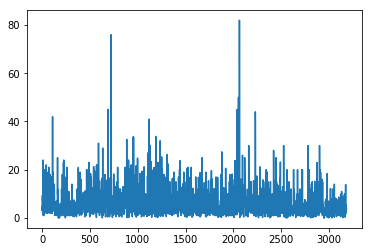

In [43]:
loc9pound.quantity.plot()

In [44]:
loc9pound.dtypes

Unnamed: 0        int64
itemname         object
mealtype         object
quantity        float64
quantitytype     object
datesort          int64
dtype: object

In [45]:
loc9pound["itemid"] = loc9pound["itemname"].astype('category')
loc9pound.dtypes

Unnamed: 0         int64
itemname          object
mealtype          object
quantity         float64
quantitytype      object
datesort           int64
itemid          category
dtype: object

In [46]:
loc9pound["mealtypeid"] = loc9pound["mealtype"].astype('category')
loc9pound.dtypes

Unnamed: 0         int64
itemname          object
mealtype          object
quantity         float64
quantitytype      object
datesort           int64
itemid          category
mealtypeid      category
dtype: object

In [47]:
data199 = pd.read_csv("data199.csv")

In [48]:
data199.head()

,Unnamed: 0,X,itemname,mealtype,quantity,quantitytype,datesort,itemid,mealtypeid
0,21,30,Meat Sauce,NaN,1.0,Pound,2,199,1
1,33,48,Meat Sauce,NaN,6.0,Pound,2,199,1
2,39,54,Meat Sauce,NaN,6.0,Pound,2,199,1
3,52,82,Meat Sauce,NaN,8.0,Pound,3,199,1
4,66,101,Meat Sauce,NaN,4.0,Pound,4,199,1


In [49]:
train199, test199 = train_test_split(data199, test_size=0.2)

In [50]:
train199.describe()

,Unnamed: 0,X,quantity,datesort,itemid,mealtypeid
count,168.000000,168.000000,168.000000,168.000000,168.0,168.000000
mean,1620.839286,2552.059524,3.736905,383.732143,199.0,1.244048
std,899.106658,1501.966801,2.372158,276.666177,0.0,0.696415
min,21.000000,30.000000,0.200000,2.000000,199.0,1.000000
25%,851.750000,1232.750000,2.000000,198.750000,199.0,1.000000
50%,1715.500000,2675.500000,3.000000,351.500000,199.0,1.000000
75%,2378.250000,3778.000000,5.000000,575.000000,199.0,1.000000
max,3134.000000,5151.000000,11.000000,1059.000000,199.0,4.000000


In [51]:
test199.describe()

,Unnamed: 0,X,quantity,datesort,itemid,mealtypeid
count,42.000000,42.000000,42.000000,42.000000,42.0,42.000000
mean,1619.023810,2550.761905,4.783333,378.595238,199.0,1.214286
std,850.378466,1433.759969,3.384680,251.558368,0.0,0.682024
min,151.000000,213.000000,0.200000,9.000000,199.0,1.000000
25%,986.000000,1472.250000,2.000000,215.750000,199.0,1.000000
50%,1518.500000,2344.000000,4.300000,321.000000,199.0,1.000000
75%,2534.750000,4104.000000,6.075000,649.250000,199.0,1.000000
max,3013.000000,5020.000000,15.000000,1041.000000,199.0,4.000000


In [52]:
testtry199 = pd.read_csv("testtry199.csv")

In [53]:
clf=RandomForestClassifier(n_estimators=100)

In [54]:
Xtrain199=train199[['datesort', 'itemid', 'mealtypeid']]

In [55]:
Ytrain199=train199[['quantity']]

In [56]:
Xtest199=test199[['datesort', 'itemid', 'mealtypeid']]

In [57]:
Ytest199=test199['quantity']

In [58]:
Ytest199.describe()

count    42.000000
mean      4.783333
std       3.384680
min       0.200000
25%       2.000000
50%       4.300000
75%       6.075000
max      15.000000
Name: quantity, dtype: float64

In [59]:
Xtrain199.describe()

,datesort,itemid,mealtypeid
count,168.000000,168.0,168.000000
mean,383.732143,199.0,1.244048
std,276.666177,0.0,0.696415
min,2.000000,199.0,1.000000
25%,198.750000,199.0,1.000000
50%,351.500000,199.0,1.000000
75%,575.000000,199.0,1.000000
max,1059.000000,199.0,4.000000


In [60]:
clf.fit(Xtrain199,Ytrain199)

/Users/siddhant/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


ValueError: Unknown label type: 'continuous'

In [61]:
lab_enc = preprocessing.LabelEncoder()
Ytrain199_encoded = lab_enc.fit_transform(Ytrain199)
print(Ytrain199_encoded)
print(utils.multiclass.type_of_target(Ytrain199))
print(utils.multiclass.type_of_target(Ytrain199.astype('int')))
print(utils.multiclass.type_of_target(Ytrain199_encoded))

[22  9 14 45  4 17 55 52 50  2 25 12 12 44 24 20 12 36 35 29 12 22 27 11
 28 35  8  8 12 38 12 26 11 22 12 28  4 35 38 17 21 12 28 49  6 34 47  7
  4 45 10 52  7  7  1 35 43 24  5 27 12 51 23  4 35  3 54 46 28 22 16 33
  4  4 23 22 12 53 11 16 17 35 42 14 12 26  2  4 40 19 28 23 40 12 40  4
 32 48 41 28  8 17  1 22 28 11  4 40 50  6 32 40 10 38  2 16 30 33 28 15
 44 33 23 48 22 21 40  4 22 28 37 19 35 52 18  2 22 29 19 38 52 31 28 22
 12 26 32  4 11 12 35 47 40 22 39  0 19 18  8 49 13 40 33 18 12 22 12 36]
continuous
multiclass
multiclass


/Users/siddhant/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [62]:
clf.fit(Xtrain199,Ytrain199_encoded)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [63]:
y_pred=clf.predict(Xtest199)

In [64]:
y_pred

array([12,  8, 22, 29,  8, 52,  8,  4, 17, 49, 40, 12, 10, 12, 24, 49, 52,
       52, 28, 12, 22, 18, 40, 14, 11, 12,  8, 35,  9,  2, 32, 24, 46, 36,
       51, 12, 32, 22,  2, 22,  8, 35])

In [65]:
Ytest199 - y_pred

203   -10.5
82      1.0
157   -17.0
174   -28.5
80     -3.4
55    -50.2
49     -3.0
87      2.0
125   -15.3
84    -40.9
6     -38.0
167   -11.0
124    -7.4
131   -10.8
99    -18.4
83    -43.2
42    -45.2
56    -40.0
67    -25.7
169    -8.6
53    -21.8
170   -16.0
9     -38.0
183   -11.9
96     -7.6
177    -8.9
47     -6.0
196   -29.0
76     -6.0
185     1.0
26    -26.6
128   -18.5
37    -42.0
133   -25.5
189   -43.0
111    -5.9
27    -23.8
62    -20.5
108     6.0
16    -17.0
81      3.0
188   -20.0
Name: quantity, dtype: float64

In [66]:
Ytest199

203     1.5
82      9.0
157     5.0
174     0.5
80      4.6
55      1.8
49      5.0
87      6.0
125     1.7
84      8.1
6       2.0
167     1.0
124     2.6
131     1.2
99      5.6
83      5.8
42      6.8
56     12.0
67      2.3
169     3.4
53      0.2
170     2.0
9       2.0
183     2.1
96      3.4
177     3.1
47      2.0
196     6.0
76      3.0
185     3.0
26      5.4
128     5.5
37      4.0
133    10.5
189     8.0
111     6.1
27      8.2
62      1.5
108     8.0
16      5.0
81     11.0
188    15.0
Name: quantity, dtype: float64

In [162]:
testtry199 = pd.read_csv("testtry199.csv")

In [163]:
data199 = pd.read_csv("data199.csv")

In [164]:
print('The shape of our features is:', data199.shape)

The shape of our features is: (210, 9)


In [165]:
data199.describe()

,Unnamed: 0,X,quantity,datesort,itemid,mealtypeid
count,210.000000,210.000000,210.000000,210.000000,210.0,210.000000
mean,1620.476190,2551.800000,3.946190,382.704762,199.0,1.238095
std,887.582034,1485.203647,2.630536,271.257127,0.0,0.692044
min,21.000000,30.000000,0.200000,2.000000,199.0,1.000000
25%,875.750000,1265.750000,2.000000,201.250000,199.0,1.000000
50%,1691.000000,2641.500000,3.200000,348.500000,199.0,1.000000
75%,2404.500000,3823.750000,5.475000,582.500000,199.0,1.000000
max,3134.000000,5151.000000,15.000000,1059.000000,199.0,4.000000


In [166]:
data199.head(5)

,Unnamed: 0,X,itemname,mealtype,quantity,quantitytype,datesort,itemid,mealtypeid
0,21,30,Meat Sauce,NaN,1.0,Pound,2,199,1
1,33,48,Meat Sauce,NaN,6.0,Pound,2,199,1
2,39,54,Meat Sauce,NaN,6.0,Pound,2,199,1
3,52,82,Meat Sauce,NaN,8.0,Pound,3,199,1
4,66,101,Meat Sauce,NaN,4.0,Pound,4,199,1


In [167]:
labels = np.array(data199['quantity'])

In [168]:
data199= data199.drop('quantity', axis = 1)
data199= data199.drop('itemname', axis = 1)
data199= data199.drop('mealtype', axis = 1)
data199= data199.drop('quantitytype', axis = 1)

In [169]:
data199.dtypes

Unnamed: 0    int64
X             int64
datesort      int64
itemid        int64
mealtypeid    int64
dtype: object

In [170]:
data199.head(5)

,Unnamed: 0,X,datesort,itemid,mealtypeid
0,21,30,2,199,1
1,33,48,2,199,1
2,39,54,2,199,1
3,52,82,3,199,1
4,66,101,4,199,1


In [171]:
# Saving feature names for later use
data199_list = list(data199.columns)
# Convert to numpy array
data199 = np.array(data199)

In [172]:
train_data199, test_data199, train_labels, test_labels = train_test_split(data199, labels, test_size = 0.20, random_state = 42)

In [173]:
test_data199

array([[ 458,  627,   31,  199,    1],
       [2623, 4287,  681,  199,    1],
       [1418, 2176,  306,  199,    1],
       [2962, 4966, 1032,  199,    4],
       [1052, 1575,  223,  199,    1],
       [2373, 3770,  574,  199,    1],
       [ 755, 1071,  187,  199,    1],
       [2741, 4462,  702,  199,    1],
       [ 185,  251,   10,  199,    1],
       [2911, 4860,  761,  199,    3],
       [1991, 3064,  402,  199,    1],
       [2824, 4616,  729,  199,    3],
       [3106, 5123, 1056,  199,    3],
       [1888, 2922,  389,  199,    1],
       [ 242,  331,   16,  199,    1],
       [1212, 1856,  256,  199,    1],
       [2537, 4098,  630,  199,    1],
       [ 295,  399,   19,  199,    1],
       [2588, 4236,  675,  199,    1],
       [1536, 2349,  324,  199,    1],
       [1243, 1911,  260,  199,    1],
       [ 979, 1461,  215,  199,    1],
       [2169, 3385,  489,  199,    1],
       [1727, 2692,  354,  199,    1],
       [1723, 2685,  353,  199,    1],
       [2050, 3151,  476,

In [181]:
pd.DataFrame(test_data199).to_csv("test_data199.csv")

In [190]:
testtry_data199 = pd.read_csv("testtry_data199.csv")

In [191]:
testtry_data199.head(5)

,Unnamed: 0,0,1,2,3,4
0,0,458,627,1060,199,1
1,1,2623,4287,1061,199,2
2,2,1418,2176,1062,199,3
3,3,2962,4966,1063,199,4
4,4,1052,1575,1064,199,1


In [192]:
testtry_data199.drop(testtry_data199.columns[[0]], axis=1, inplace=True)

In [193]:
testtry_data199 = np.array(testtry_data199)

In [194]:
print('Testing testtry data199 Shape:', testtry_data199.shape)

Testing testtry data199 Shape: (42, 5)


In [174]:
print('Training data199 Shape:', train_data199.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing data199 Shape:', test_data199.shape)
print('Testing Labels Shape:', test_labels.shape)

Training data199 Shape: (168, 5)
Training Labels Shape: (168,)
Testing data199 Shape: (42, 5)
Testing Labels Shape: (42,)


In [175]:
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)

In [176]:
rf.fit(train_data199, train_labels);

In [177]:
predictions = rf.predict(test_data199)

In [178]:
predictions

array([ 5.282 ,  2.4773,  6.3191,  5.2034,  2.7593,  3.5866,  4.0415,
        2.38  ,  2.608 ,  3.8065,  3.9581,  6.2338,  2.0045,  2.3971,
        2.5867,  2.3665,  6.4666,  2.8168,  2.3561,  2.9548,  3.0609,
       10.3116,  3.4337,  1.2756,  1.2498,  3.9763,  5.7724,  2.221 ,
        2.5869,  1.5984,  3.3681,  7.1339,  4.3107,  5.068 ,  3.4941,
        4.5911,  3.0097,  4.5956,  8.3293,  3.6642,  3.8617,  5.5018])

In [144]:
np.mean(predictions)

3.9290357142857126

In [143]:
x = abs(predictions - test_labels)

In [132]:
errors = abs(predictions - test_labels)

In [133]:
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 1.89 degrees.


In [135]:
errors

array([0.718 , 0.1227, 1.7809, 2.2034, 1.4593, 0.3866, 2.2415, 1.48  ,
       0.608 , 2.1935, 0.1419, 2.5662, 2.7955, 0.1029, 0.5867, 0.3665,
       6.0666, 0.8168, 0.3561, 1.9548, 1.4609, 8.5116, 3.5663, 2.3244,
       6.7502, 0.1763, 1.2724, 0.521 , 2.4131, 0.8016, 1.3681, 1.8661,
       0.6893, 2.768 , 2.5059, 1.5911, 0.9903, 2.7956, 0.6707, 1.3358,
       1.1383, 5.0018])

In [136]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / test_labels)


In [139]:
np.mean(mape)

118.34580102213559

In [145]:
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: -18.35 %.


In [146]:
testtry199.describe()

,Unnamed: 0,X.1,X,mealtype,quantity,datesort,itemid,mealtypeid
count,31.000000,31.000000,31.000000,0.0,31.000000,31.000000,31.0,31.000000
mean,70.774194,1121.677419,1702.774194,NaN,4.103226,1075.000000,199.0,1.193548
std,40.921640,619.353985,980.085905,NaN,2.469748,9.092121,0.0,0.654184
min,4.000000,52.000000,82.000000,NaN,0.400000,1060.000000,199.0,1.000000
25%,37.000000,592.500000,831.000000,NaN,2.000000,1067.500000,199.0,1.000000
50%,70.000000,1166.000000,1768.000000,NaN,3.400000,1075.000000,199.0,1.000000
75%,104.500000,1673.000000,2611.000000,NaN,6.050000,1082.500000,199.0,1.000000
max,139.000000,2014.000000,3089.000000,NaN,9.000000,1090.000000,199.0,4.000000


In [195]:
trypredictions = rf.predict(testtry_data199)

In [196]:
trypredictions

array([5.0919, 2.9117, 5.1523, 4.8941, 4.4771, 4.0684, 4.7785, 2.8905,
       3.952 , 3.2552, 3.7732, 3.8426, 1.9041, 3.6094, 4.044 , 4.3167,
       4.8781, 4.0878, 2.8265, 4.1159, 4.4322, 6.7123, 3.9256, 3.4809,
       3.4489, 3.7958, 5.1833, 3.5285, 4.044 , 2.7134, 2.9705, 5.3172,
       4.163 , 4.9007, 3.8162, 4.7696, 3.1449, 4.5726, 5.9289, 4.0911,
       3.6409, 4.5454])